In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

plt.style.use('ggplot') # make plots look better

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# class distribution
print(df.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [10]:
# Train-Test Split
train, test = train_test_split(df, test_size = 0.4, stratify = df['Species'], random_state = 42)

## Exploratory Data Analysis

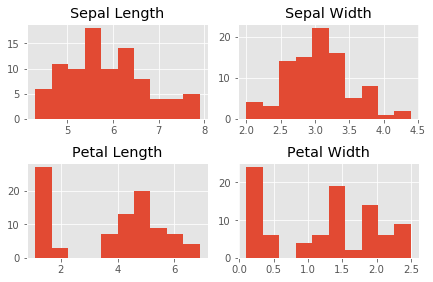

In [13]:
# Hist
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train['SepalLengthCm'], bins = 10);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(train['SepalWidthCm'], bins = 10);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(train['PetalLengthCm'], bins = 10);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(train['PetalWidthCm'], bins = 10);
axs[1,1].set_title('Petal Width');
# add some spacing between subplots
fig.tight_layout(pad=1.0);

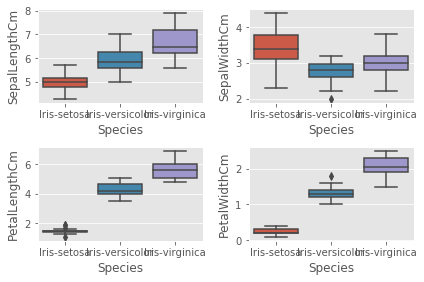

In [37]:
# Box Plot
fig, axs = plt.subplots(2, 2)
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = train, order = classes, ax = axs[0,0]);
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = train, order = classes, ax = axs[0,1]);
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = train, order = classes, ax = axs[1,0]);
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = train,  order = classes, ax = axs[1,1]);
# add some spacing between subplots
fig.tight_layout(pad=1.0);

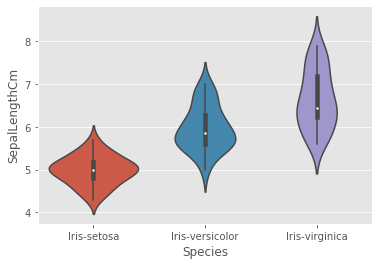

In [42]:
# Violin Plot SepalLengthCm
# Violin Plot
sns.violinplot(x="Species", y="SepalLengthCm", data=train, size=5, order = classes);

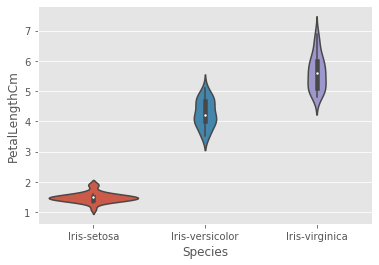

In [41]:
sns.violinplot(x="Species", y="PetalLengthCm", data=train, size=5, order = classes);

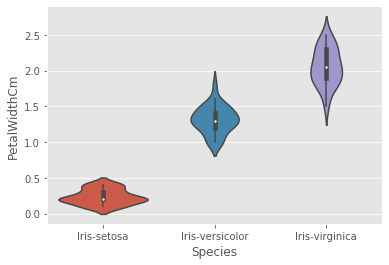

In [43]:
sns.violinplot(x="Species", y="PetalWidthCm", data=train, size=5, order = classes);

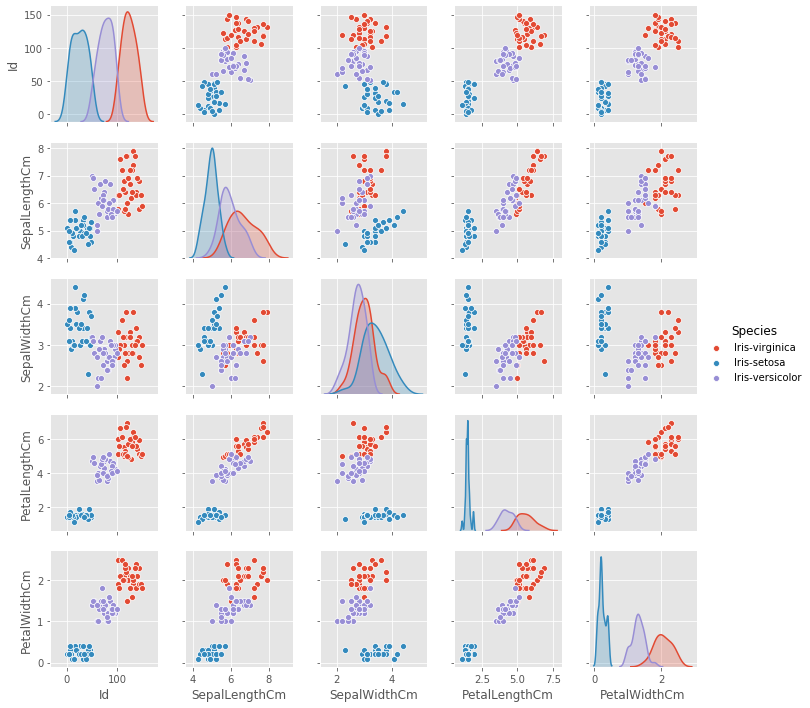

In [45]:
# Scatter plot
sns.pairplot(train, hue="Species", height = 2);

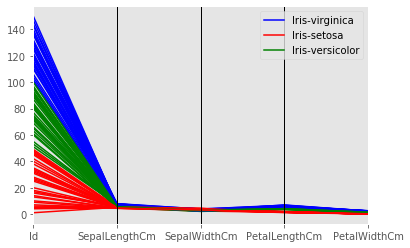

In [48]:
# parallel coordinate plot
parallel_coordinates(train, "Species", color = ['blue', 'red', 'green']);

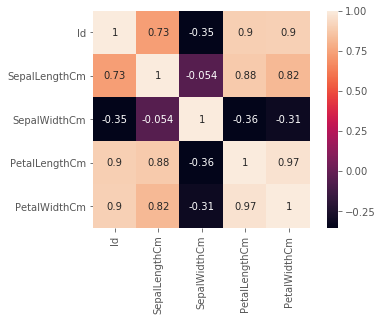

In [46]:
# Correlation Matrix
corrmat = train.corr()
sns.heatmap(corrmat, annot = True, square = True);

## Classifiers

In [51]:
# Separate class label and features
X_train = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_train = train.Species
X_test = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_test = test.Species

In [53]:
# Classification Tree
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.983


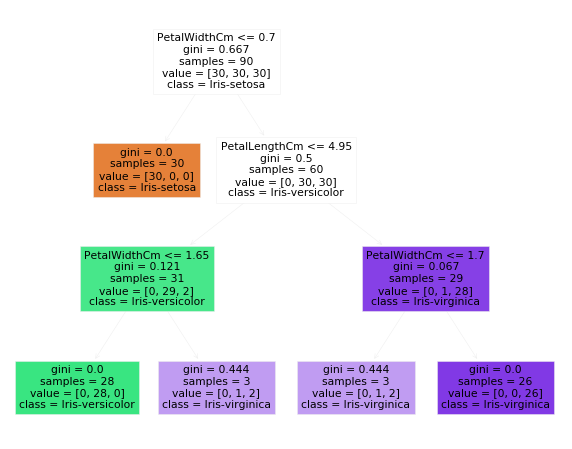

In [57]:
plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = features, class_names = classes, filled = True);

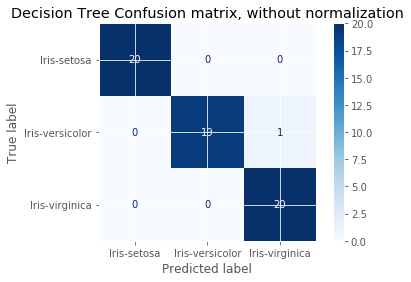

In [60]:
#Confusion Matrix
https://towardsdatascience.com/exploring-classifiers-with-python-scikit-learn-iris-dataset-2bcb490d2e1b
#Through this matrix, we see that there is one versicolor which we predict to be virginica.
disp = metrics.plot_confusion_matrix(mod_dt, X_test, y_test,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization');

## Let's go Deeper with Feature Selection
We want the least amount of features that gives us as much information about our data as possible.

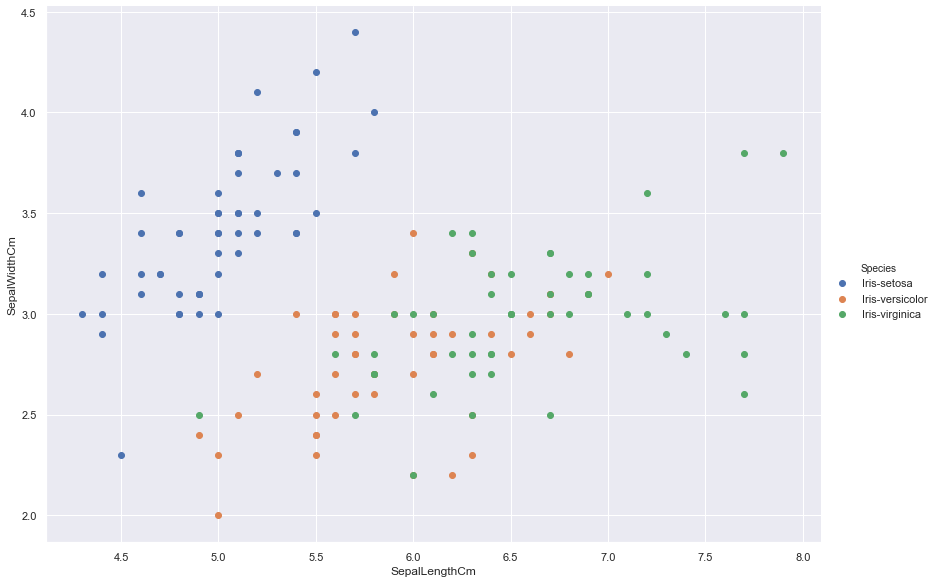

In [70]:
sns.FacetGrid(df,  
    hue="Species", height=8.27, aspect=11.7/8.27).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

plt.show()

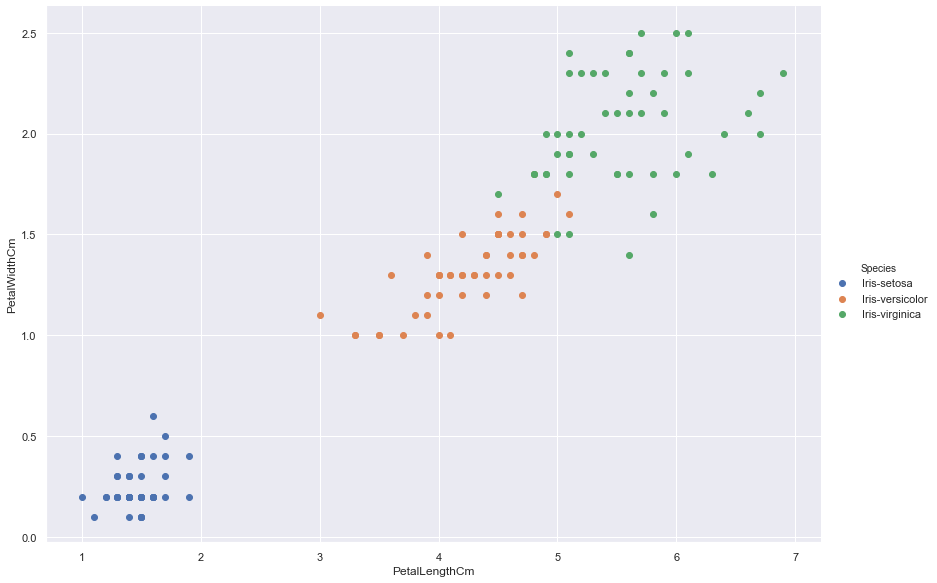

In [71]:
sns.FacetGrid(df,  
    hue="Species", height=8.27, aspect=11.7/8.27).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend()

plt.show()

So Sepals features are not that affecting to classify 3 Species, but Petals are much. Though there seems some overlap in theboundary of iris-versicolor and iris-virginca. So keep that in mind during training.

N.B. If correlating different features in order to select the best ones sounds like a lot of work, it should be noted that there are automated methods of doing this such as **kbest, and recursive feature elimination** both of which are available in sklearn.

## Prepare Data
All the data is encoded in a DataFrame, but sklearn doesn't work with pandas' DataFrames, so we need to extract the features and labels and convert them into numpy arrays instead.

In [72]:
labels = np.asarray(df.Species)

In [73]:
# use LabelEncoder to label "String" Species as Numerical ones.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(labels)

# apply encoding to labels
labels = le.transform(labels)

In [74]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
5,6,5.4,3.9,1.7,0.4,Iris-setosa
66,67,5.6,3.0,4.5,1.5,Iris-versicolor
85,86,6.0,3.4,4.5,1.6,Iris-versicolor
22,23,4.6,3.6,1.0,0.2,Iris-setosa
68,69,6.2,2.2,4.5,1.5,Iris-versicolor


In [77]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

so the Species are now changed as class: 0, 1 and 2. If we ever want to return to the string labels we can use **le.inverse_transform(labels)**.
Now we drop the rest data.

In [78]:
df_selected = df.drop(['SepalLengthCm', 'SepalWidthCm', "Id", "Species"], axis=1)

Now we only have the columns PetalLengthCm and PetalWidthCm left.

Since we want to use more than one column, we can't just simply use np.asarray(). Instead, we can use the to_dict() method together with sklearn's DictVectorizer.



In [79]:
df_features = df_selected.to_dict(orient='records')

In [82]:
df_features[:5]

[{'PetalLengthCm': 1.4, 'PetalWidthCm': 0.2},
 {'PetalLengthCm': 1.4, 'PetalWidthCm': 0.2},
 {'PetalLengthCm': 1.3, 'PetalWidthCm': 0.2},
 {'PetalLengthCm': 1.5, 'PetalWidthCm': 0.2},
 {'PetalLengthCm': 1.4, 'PetalWidthCm': 0.2}]

In [83]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
features = vec.fit_transform(df_features).toarray()

In [95]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split( features, labels, test_size=0.33, random_state=42)

In [96]:
# Now Classify again
from sklearn.ensemble import RandomForestClassifier

# initialize
clf = RandomForestClassifier()

# train the classifier using the training data
clf.fit(features_train, labels_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [97]:
# compute accuracy using test data
acc_test = clf.score(features_test, labels_test)

print ("Test Accuracy:", acc_test)

Test Accuracy: 1.0


In [98]:
# compute accuracy using training data
acc_train = clf.score(features_train, labels_train)

print ("Train Accuracy:", acc_train)

Train Accuracy: 0.99


Maybe the model is slightly underfitting. But it's very little.<br>
Now we predict for a new flower.

In [99]:
flower = [[5.2,0.9]]
class_code = clf.predict(flower)

In [100]:
class_code

array([1])

In [101]:
decoded_class = le.inverse_transform(class_code)
print (decoded_class) # ['Iris-versicolor']

['Iris-versicolor']


In [103]:
pred = clf.predict(features_test)

In [104]:
#Evaluation
from sklearn.metrics import recall_score, precision_score

precision = precision_score(labels_test, pred, average="weighted")
recall = recall_score(labels_test, pred, average="weighted")

print ("Precision:", precision) # Precision: 0.98125
print ("Recall:", recall) # Recall: 0.98

Precision: 1.0
Recall: 1.0


### Let's enter some parameter and check again

In [105]:
clf = RandomForestClassifier(
    min_samples_split=4,
    criterion="entropy"
)


In [106]:
clf.fit(features_train, labels_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [107]:
acc_test = clf.score(features_test, labels_test)
acc_train = clf.score(features_train, labels_train)
print ("Train Accuracy:", acc_train)
print ("Test Accuracy:", acc_test)

Train Accuracy: 0.98
Test Accuracy: 0.98


In [108]:
pred = clf.predict(features_test)

In [109]:
precision = precision_score(labels_test, pred, average="weighted")
recall = recall_score(labels_test, pred, average="weighted")

print ("Precision:", precision)
print ("Recall:", recall)

Precision: 0.98125
Recall: 0.98


In [110]:
# Now SVC
from sklearn.svm import SVC
clf = SVC()

In [111]:
clf.fit(features_train, labels_train)

# find the accuracy of the model
acc_test = clf.score(features_test, labels_test)
acc_train = clf.score(features_train, labels_train)
print ("Train Accuracy:", acc_train)
print ("Test Accuracy:", acc_test)

Train Accuracy: 0.95
Test Accuracy: 1.0


In [114]:
# compute predictions on test features
pred = clf.predict(features_test)

# predict our new unique iris flower
flower = [[5.2,0.9]]
class_code = clf.predict(flower)
class_code

array([1])

In [115]:
from sklearn.metrics import recall_score, precision_score

precision = precision_score(labels_test, pred, average="weighted")
recall = recall_score(labels_test, pred, average="weighted")

print ("Precision:", precision)
print ("Recall:", recall)

Precision: 1.0
Recall: 1.0
